<a href="https://colab.research.google.com/github/debfdias/API-default/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [ ]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2020.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2020.csv", encoding ="UTF-8")

dengue19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2019.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2019.csv", encoding ="UTF-8")


dengue18 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2018.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb18 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2018.csv", encoding ="UTF-8")

dengue17 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2017.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb17 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2017.csv", encoding ="UTF-8")

dengue16 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2016.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb16 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2016.csv", encoding ="UTF-8")


b'Skipping line 108: expected 126 fields, saw 127\nSkipping line 1485: expected 126 fields, saw 127\nSkipping line 2584: expected 126 fields, saw 127\nSkipping line 4415: expected 126 fields, saw 127\nSkipping line 5659: expected 126 fields, saw 127\nSkipping line 6469: expected 126 fields, saw 127\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (55,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Detalhamento de datasets**


In [ ]:
emlurb.head()

In [ ]:
dengue.head()

## **Reorganização de Datasets e merge**

Como o data frame com dados de dengue é muito robusto, usaremos apenas as colunas que nos interessam. E estas são: bairro e data de registro do caso. Agrupamos os casos por mês e totalizamos as ocorrências mensais. Outras análise podem ser interessantes, como agrupamento por bairro e por dia.

 ## Dados de 2020


In [ ]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data['dt_notificacao'] = pd.to_datetime(dengue_data['dt_notificacao'])

# Número de casos por mês
dengue_data = dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data = dengue_data.drop(dengue_data.index[[0]])

# Número de casos por bairro
# dengue_data.groupby("no_bairro_residencia").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# dengue_data["dt_notificacao"].value_counts().sort_values(ascending=False)

display(dengue_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dt_notificacao,CASOS_DENGUE
1,2020-01-31,195
2,2020-02-29,182
3,2020-03-31,199
4,2020-04-30,69
5,2020-05-31,47
6,2020-06-30,207
7,2020-07-31,109


In [ ]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

print("Número de solicitações de drenagem registradas em 2020 = " + str(len(emlurb_data.index)))

# Número de solicitações por mês
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

# Número de casos por bairro
# emlurb_data.groupby("BAIRRO").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="D")]).size().sort_values(ascending=False).reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data)

Número de solicitações de drenagem registradas em 2020 = 8340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2020-01-31,675
1,2020-02-29,694
2,2020-03-31,902
3,2020-04-30,443
4,2020-05-31,500
5,2020-06-30,633
6,2020-07-31,950
7,2020-08-31,830
8,2020-09-30,798
9,2020-10-31,745


Agora que temos duas tabelas, **dengue_data**, com informação dos casos de dengue por mês, e **emlurb_data**, com informação dos pedidos de drenagem solicitados pela população por mês, faremos o merge das duas tabelas para unificar todos esses dados.


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])

display(crossed_info)

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2020-01-31,195,2020-01-31,675
1,2020-02-29,182,2020-02-29,694
2,2020-03-31,199,2020-03-31,902
3,2020-04-30,69,2020-04-30,443
4,2020-05-31,47,2020-05-31,500
5,2020-06-30,207,2020-06-30,633
6,2020-07-31,109,2020-07-31,950


Com a tabela **crossed_info**, conseguimos reunir o número de casos de dengue e o número de chamados de drenagem por mês no grande Recife. Ainda podemos cruzar as informações com outros parâmetros como bairro, diária, status de solicitação etc.

## Dados de 2019 - 2016


Iremos fazer os mesmos tratamentos anteriores para os dados de 2019 até 2016.

In [ ]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data19 = dengue19[["no_bairro_residencia", "dt_notificacao"]]
dengue_data19['dt_notificacao'] = pd.to_datetime(dengue_data19['dt_notificacao'])

dengue_data18 = dengue18[["no_bairro_residencia", "dt_notificacao"]]
dengue_data18['dt_notificacao'] = pd.to_datetime(dengue_data18['dt_notificacao'])

dengue_data17 = dengue17[["no_bairro_residencia", "dt_notificacao"]]
dengue_data17['dt_notificacao'] = pd.to_datetime(dengue_data17['dt_notificacao'])

dengue_data16 = dengue16[["no_bairro_residencia", "dt_notificacao"]]
dengue_data16['dt_notificacao'] = pd.to_datetime(dengue_data16['dt_notificacao'])

# Número de casos por mês
dengue_data19 = dengue_data19.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data19 = dengue_data19.drop(dengue_data19.index[[12,13]])

dengue_data18 = dengue_data18.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data18 = dengue_data18.drop(index=[12,13,14,15,16,17,18,19,20,21,22,23,24,25])


dengue_data17 = dengue_data17.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data17 = dengue_data17.drop(index=[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

dengue_data16 = dengue_data16.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data16 = dengue_data16.drop(index=[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])

display(dengue_data19)
display(dengue_data18)
display(dengue_data17)
display(dengue_data16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,dt_notificacao,CASOS_DENGUE
0,2019-01-31,91
1,2019-02-28,178
2,2019-03-31,263
3,2019-04-30,485
4,2019-05-31,972
5,2019-06-30,704
6,2019-07-31,1004
7,2019-08-31,868
8,2019-09-30,966
9,2019-10-31,882


,dt_notificacao,CASOS_DENGUE
0,2018-01-31,73
1,2018-02-28,130
2,2018-03-31,151
3,2018-04-30,344
4,2018-05-31,419
5,2018-06-30,311
6,2018-07-31,263
7,2018-08-31,241
8,2018-09-30,166
9,2018-10-31,198


,dt_notificacao,CASOS_DENGUE
0,2017-01-31,169
1,2017-02-28,230
2,2017-03-31,333
3,2017-04-30,213
4,2017-05-31,273
5,2017-06-30,279
6,2017-07-31,115
7,2017-08-31,196
8,2017-09-30,190
9,2017-10-31,183


,dt_notificacao,CASOS_DENGUE
0,2016-01-31,3113
1,2016-02-29,5540
2,2016-03-31,3746
3,2016-04-30,2069
4,2016-05-31,1474
5,2016-06-30,834
6,2016-07-31,464
7,2016-08-31,394
8,2016-09-30,296
9,2016-10-31,258


In [ ]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data19 = emlurb19[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]
# emlurb_data19 = emlurb_data19[emlurb_data19["SITUACAO"] != "ATENDIDA"]
emlurb_data19["DATA_DEMANDA"] = pd.to_datetime(emlurb_data19["DATA_DEMANDA"])
emlurb_data19 = emlurb_data19[(emlurb_data19.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

emlurb_data18 = emlurb18[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]
# emlurb_data18 = emlurb_data18[emlurb_data18["SITUACAO"] != "ATENDIDA"]
emlurb_data18["DATA_DEMANDA"] = pd.to_datetime(emlurb_data18["DATA_DEMANDA"])
emlurb_data18 = emlurb_data18[(emlurb_data18.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

emlurb_data17 = emlurb17[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]
# emlurb_data17 = emlurb_data17[emlurb_data17["SITUACAO"] != "ATENDIDA"]
emlurb_data17 = emlurb_data17[(emlurb_data17.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data17["DATA_DEMANDA"] = pd.to_datetime(emlurb_data17["DATA_DEMANDA"])

emlurb_data16 = emlurb16[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]
# emlurb_data16 = emlurb_data16[emlurb_data16["SITUACAO"] != "ATENDIDA"]
emlurb_data16["DATA_DEMANDA"] = pd.to_datetime(emlurb_data16["DATA_DEMANDA"])
emlurb_data16 = emlurb_data16[(emlurb_data16.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

# # Número de solicitações por mês
emlurb_data19 = emlurb_data19.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data18 = emlurb_data18.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data17 = emlurb_data17.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data16 = emlurb_data16.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data19)
display(emlurb_data18)
display(emlurb_data17)
display(emlurb_data16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,664
1,2019-02-28,950
2,2019-03-31,740
3,2019-04-30,1052
4,2019-05-31,1132
5,2019-06-30,933
6,2019-07-31,1018
7,2019-08-31,928
8,2019-09-30,884
9,2019-10-31,1049


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2018-01-31,727
1,2018-02-28,894
2,2018-03-31,1052
3,2018-04-30,1245
4,2018-05-31,980
5,2018-06-30,844
6,2018-07-31,811
7,2018-08-31,834
8,2018-09-30,732
9,2018-10-31,605


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2017-01-31,497
1,2017-02-28,491
2,2017-03-31,989
3,2017-04-30,804
4,2017-05-31,916
5,2017-06-30,1033
6,2017-07-31,1247
7,2017-08-31,1158
8,2017-09-30,719
9,2017-10-31,611


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2016-01-31,708
1,2016-02-29,632
2,2016-03-31,769
3,2016-04-30,586
4,2016-05-31,909
5,2016-06-30,769
6,2016-07-31,820
7,2016-08-31,763
8,2016-09-30,734
9,2016-10-31,656


In [ ]:
crossed_info19 = pd.merge(dengue_data19, emlurb_data19, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info19)

crossed_info18 = pd.merge(dengue_data18, emlurb_data18, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info18)

crossed_info17 = pd.merge(dengue_data17, emlurb_data17, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info17)

crossed_info16 = pd.merge(dengue_data16, emlurb_data16, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info16)

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,91,2019-01-31,664
1,2019-02-28,178,2019-02-28,950
2,2019-03-31,263,2019-03-31,740
3,2019-04-30,485,2019-04-30,1052
4,2019-05-31,972,2019-05-31,1132
5,2019-06-30,704,2019-06-30,933
6,2019-07-31,1004,2019-07-31,1018
7,2019-08-31,868,2019-08-31,928
8,2019-09-30,966,2019-09-30,884
9,2019-10-31,882,2019-10-31,1049


,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2018-01-31,73,2018-01-31,727
1,2018-02-28,130,2018-02-28,894
2,2018-03-31,151,2018-03-31,1052
3,2018-04-30,344,2018-04-30,1245
4,2018-05-31,419,2018-05-31,980
5,2018-06-30,311,2018-06-30,844
6,2018-07-31,263,2018-07-31,811
7,2018-08-31,241,2018-08-31,834
8,2018-09-30,166,2018-09-30,732
9,2018-10-31,198,2018-10-31,605


,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2017-01-31,169,2017-01-31,497
1,2017-02-28,230,2017-02-28,491
2,2017-03-31,333,2017-03-31,989
3,2017-04-30,213,2017-04-30,804
4,2017-05-31,273,2017-05-31,916
5,2017-06-30,279,2017-06-30,1033
6,2017-07-31,115,2017-07-31,1247
7,2017-08-31,196,2017-08-31,1158
8,2017-09-30,190,2017-09-30,719
9,2017-10-31,183,2017-10-31,611


,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2016-01-31,3113,2016-01-31,708
1,2016-02-29,5540,2016-02-29,632
2,2016-03-31,3746,2016-03-31,769
3,2016-04-30,2069,2016-04-30,586
4,2016-05-31,1474,2016-05-31,909
5,2016-06-30,834,2016-06-30,769
6,2016-07-31,464,2016-07-31,820
7,2016-08-31,394,2016-08-31,763
8,2016-09-30,296,2016-09-30,734
9,2016-10-31,258,2016-10-31,656


## **Testes de Hipótese**

O teste de hipótese é um método estatístico usado na tomada de decisões estatísticas usando dados de um conjunto. O teste de hipóteses é basicamente uma suposição que fazemos sobre o parâmetro do dataset.

Agora, ao realizar os t-test, normalmente se tem as seguintes duas hipóteses:

*   Hipóteses nulas: as médias de dois grupos são iguais
*   Hipóteses alternativas: as médias de dois grupos são diferentes (bicaudais)

In [ ]:
#Testes de Hipótese para dados de 2020

crossed_info['mes'] = crossed_info.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['05', '06','07'] #meses de chuva 
dengue_data_meses = crossed_info[(crossed_info.mes.isin(meses_analise))]
dengue_data_meses['mes'] = pd.to_numeric(dengue_data_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data_meses['CASOS_DENGUE'], dengue_data_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data_meses['CHAMADOS_EMLURB'], dengue_data_meses['mes'], equal_var=True)
display(th_emlurb)

In [ ]:
#Testes de Hipótese para dados de 2019-2016

crossed_info19['mes'] = crossed_info19.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data19_meses = crossed_info19[(crossed_info19.mes.isin(meses_analise))]
dengue_data19_meses['mes'] = pd.to_numeric(dengue_data19_meses['mes'])

crossed_info18['mes'] = crossed_info18.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data18_meses = crossed_info18[(crossed_info18.mes.isin(meses_analise))]
dengue_data18_meses['mes'] = pd.to_numeric(dengue_data18_meses['mes'])

crossed_info17['mes'] = crossed_info17.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data17_meses = crossed_info17[(crossed_info17.mes.isin(meses_analise))]
dengue_data17_meses['mes'] = pd.to_numeric(dengue_data17_meses['mes'])

crossed_info16['mes'] = crossed_info16.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data16_meses = crossed_info16[(crossed_info16.mes.isin(meses_analise))]
dengue_data16_meses['mes'] = pd.to_numeric(dengue_data16_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data19_meses['CASOS_DENGUE'], dengue_data19_meses['mes'], equal_var=True)
display(th_dengue)

th_dengue = stats.ttest_ind(dengue_data18_meses['CASOS_DENGUE'], dengue_data18_meses['mes'], equal_var=True)
display(th_dengue)

th_dengue = stats.ttest_ind(dengue_data17_meses['CASOS_DENGUE'], dengue_data17_meses['mes'], equal_var=True)
display(th_dengue)

th_dengue = stats.ttest_ind(dengue_data16_meses['CASOS_DENGUE'], dengue_data16_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data19_meses['CHAMADOS_EMLURB'], dengue_data19_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data18_meses['CHAMADOS_EMLURB'], dengue_data18_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data17_meses['CHAMADOS_EMLURB'], dengue_data17_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data17_meses['CHAMADOS_EMLURB'], dengue_data17_meses['mes'], equal_var=True)
display(th_emlurb)

th_emlurb = stats.ttest_ind(dengue_data16_meses['CHAMADOS_EMLURB'], dengue_data16_meses['mes'], equal_var=True)
display(th_emlurb)

O **p-value** é definido como a probabilidade de se
observar um valor da estatística de teste maior ou
igual ao encontrado. Tradicionalmente, o valor de corte
para rejeitar a hipótese nula é de 0,05, o que significa
que, quando não há nenhuma diferença, um valor tão
extremo para a estatística de teste é esperado em menos
de 5% das vezes

## **Correlações**

Fazer teste de Pearson/Spillman

In [ ]:
print("SPEARMAN")
print("\n20")
print(crossed_info.corr(method='spearman'))
print("\n19")
print(crossed_info19.corr(method='spearman'))
print("\n18")
print(crossed_info18.corr(method='spearman'))
print("\n17")
print(crossed_info17.corr(method='spearman'))
print("\n16")
print(crossed_info16.corr(method='spearman'))
print(" ")
print("------------------")
print(" ")
print("PEARSON")
print("20")
print(crossed_info.corr(method='pearson'))
print("\n19")
print(crossed_info19.corr(method='pearson'))
print("\n18")
print(crossed_info18.corr(method='pearson'))
print("\n17")
print(crossed_info17.corr(method='pearson'))
print("\n16")
print(crossed_info16.corr(method='pearson'))

SPEARMAN

20
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.357143
CHAMADOS_EMLURB      0.357143         1.000000

19
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.559441
CHAMADOS_EMLURB      0.559441         1.000000

18
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.426573
CHAMADOS_EMLURB      0.426573         1.000000

17
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.244755
CHAMADOS_EMLURB      0.244755         1.000000

16
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.343258
CHAMADOS_EMLURB      0.343258         1.000000
 
------------------
 
PEARSON
20
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.463092
CHAMADOS_EMLURB      0.463092         1.000000

19
                 CASOS_DENGUE  CHAMADOS_EMLURB
CASOS_DENGUE         1.000000         0.

## **Análise de Gráficos**

Analisaremos a tabela com dados cruzados, **crossed_info**. Coletando o número de casos de dengue e solicitações de drenagem por mês para os anos de 2020 a 2016. 

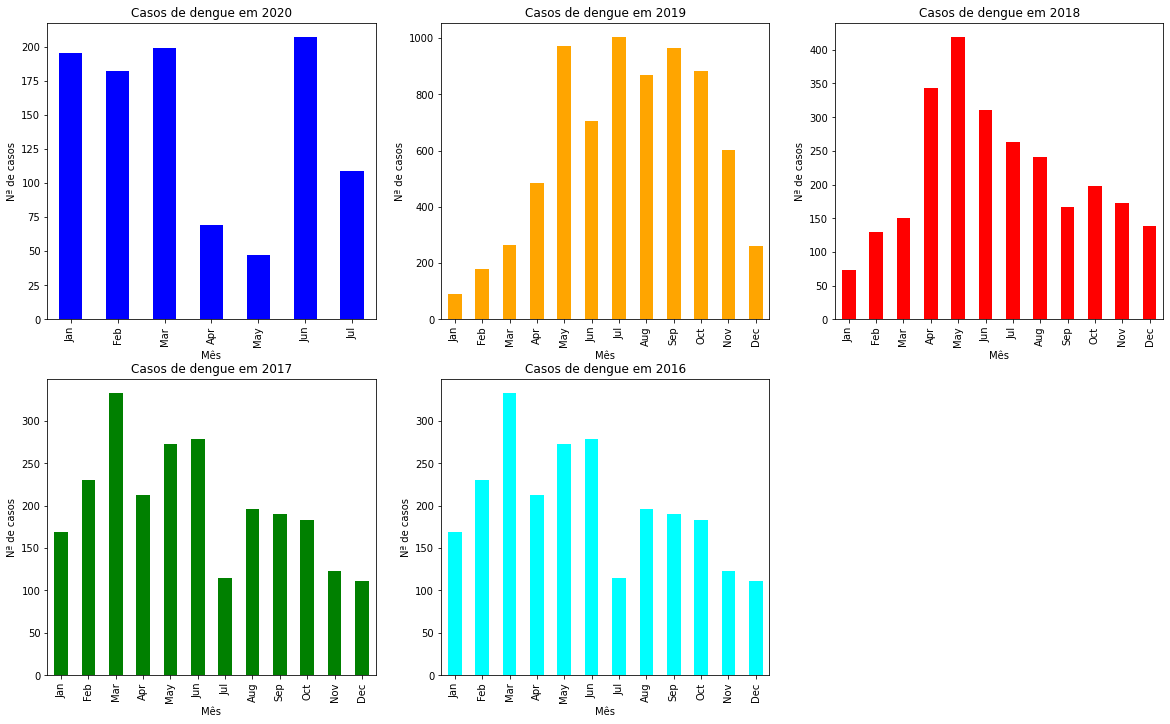

In [ ]:
# Análise para Casos de dengue x Meses de 2020 a 2016

crossed_info['mes'] = pd.to_numeric(crossed_info['mes'])
crossed_info19['mes'] = pd.to_numeric(crossed_info19['mes'])
crossed_info18['mes'] = pd.to_numeric(crossed_info18['mes'])
crossed_info17['mes'] = pd.to_numeric(crossed_info17['mes'])
crossed_info16['mes'] = pd.to_numeric(crossed_info16['mes'])

crossed_info['month'] = crossed_info['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info19['month'] = crossed_info19['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info18['month'] = crossed_info18['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info17['month'] = crossed_info17['mes'].apply(lambda x: calendar.month_abbr[x])
crossed_info16['month'] = crossed_info16['mes'].apply(lambda x: calendar.month_abbr[x])


fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 


ax1 = plt.subplot(231)
crossed_info.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax1,  title='Casos de dengue em 2020', color='blue', ylabel='Nª de casos', xlabel='Mês',)

ax2 = plt.subplot(232)
crossed_info19.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax2,title='Casos de dengue em 2019', color='orange', ylabel='Nª de casos', xlabel='Mês',)


ax3 = plt.subplot(233)
crossed_info18.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax3,title='Casos de dengue em 2018', color='red', ylabel='Nª de casos', xlabel='Mês',)


ax4 = plt.subplot(234)
crossed_info17.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax4,title='Casos de dengue em 2017', color='green', ylabel='Nª de casos', xlabel='Mês',)

ax5 = plt.subplot(235)
crossed_info17.plot.bar(x='month', y='CASOS_DENGUE', legend=False, ax=ax5,title='Casos de dengue em 2016', color='cyan', ylabel='Nª de casos', xlabel='Mês',)

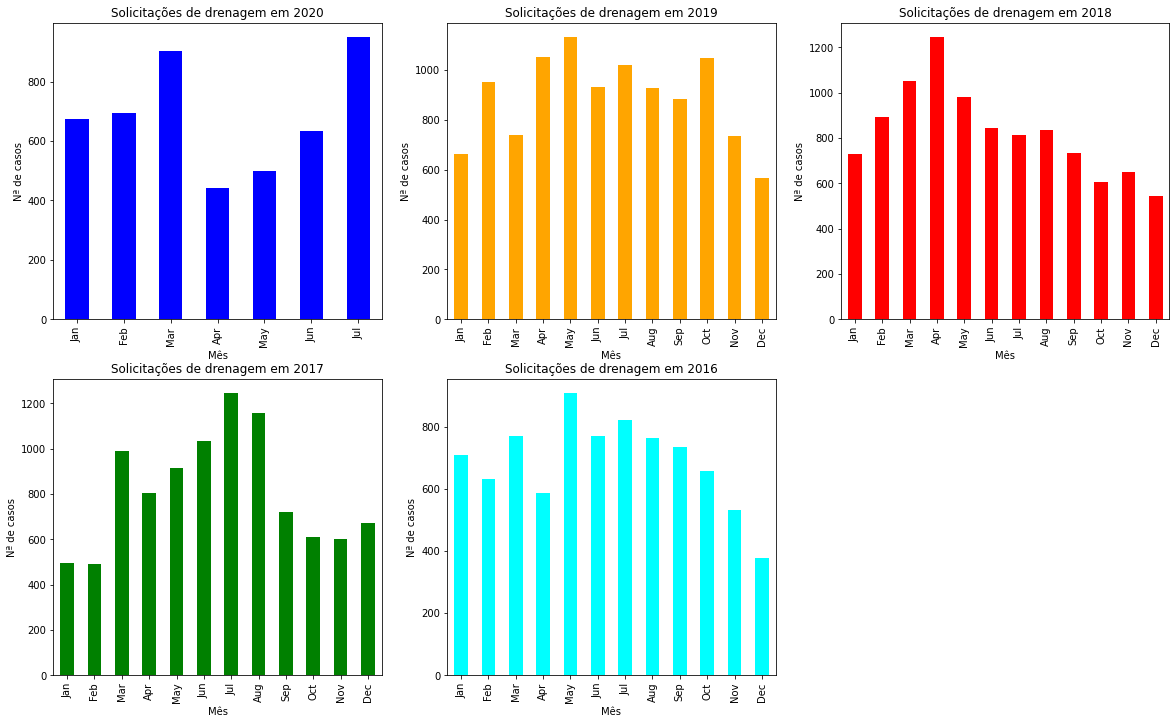

In [ ]:
# Análise para Solicitações de drenagem x Meses em 2016 a 2020

fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 

ax1 = plt.subplot(231)
crossed_info.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax1,  title='Solicitações de drenagem em 2020', color='blue', ylabel='Nª de casos', xlabel='Mês',)

ax2 = plt.subplot(232)
crossed_info19.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax2,title='Solicitações de drenagem em 2019', color='orange', ylabel='Nª de casos', xlabel='Mês',)

ax3 = plt.subplot(233)
crossed_info18.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax3,title='Solicitações de drenagem em 2018', color='red', ylabel='Nª de casos', xlabel='Mês',)

ax4 = plt.subplot(234)
crossed_info17.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax4,title='Solicitações de drenagem em 2017', color='green', ylabel='Nª de casos', xlabel='Mês',)

ax5 = plt.subplot(235)
crossed_info16.plot.bar(x='month', y='CHAMADOS_EMLURB', legend=False, ax=ax5,title='Solicitações de drenagem em 2016', color='cyan', ylabel='Nª de casos', xlabel='Mês',)

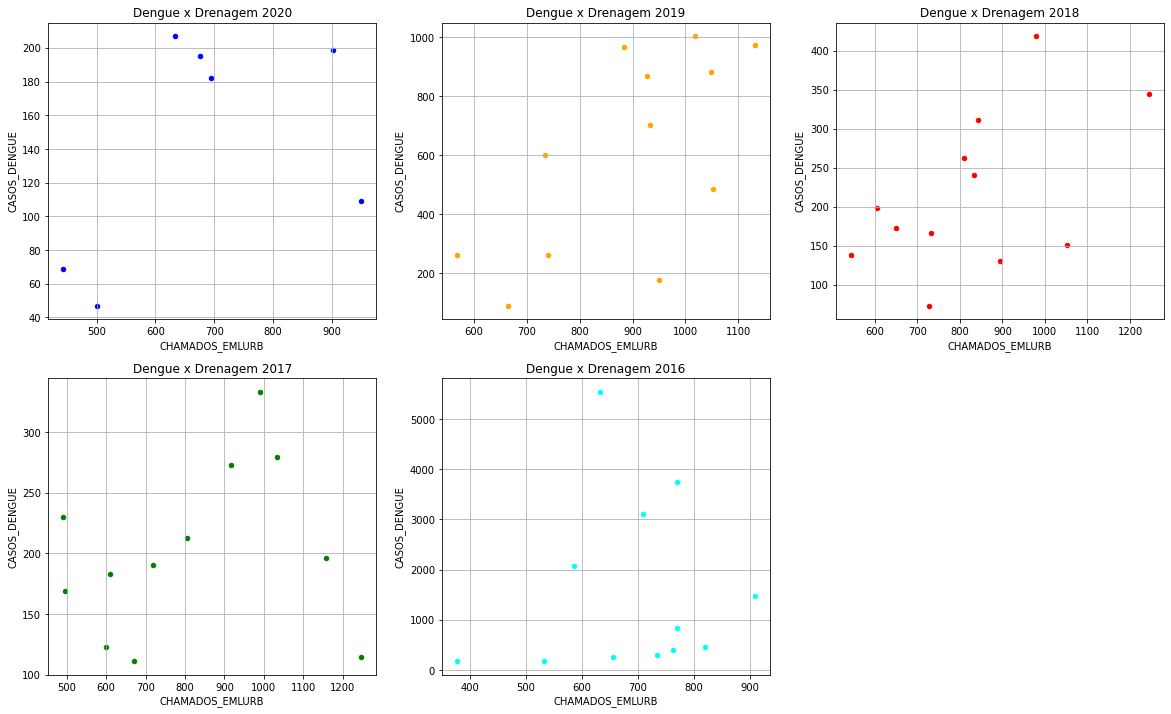

In [ ]:
# Gráfico tipo scatter relacionando Casos dengue x Solicitações de drenagens em 2016 a 2020

fig = plt.figure(1)
fig.set_figheight(12) 
fig.set_figwidth(20) 

ax1 = plt.subplot(231)
crossed_info.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax1,  title='Dengue x Drenagem 2020', color='blue',grid=True)

ax2 = plt.subplot(232)
crossed_info19.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax2,title='Dengue x Drenagem 2019', color='orange',grid=True)

ax3 = plt.subplot(233)
crossed_info18.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax3,title='Dengue x Drenagem 2018', color='red',grid=True)

ax4 = plt.subplot(234)
crossed_info17.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax4,title='Dengue x Drenagem 2017', color='green',grid=True)

ax5 = plt.subplot(235)
crossed_info16.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', legend=False, ax=ax5,title='Dengue x Drenagem 2016', color='cyan',grid=True)

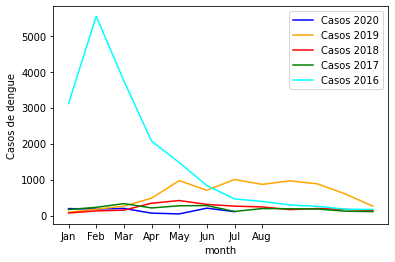

In [ ]:
# Comparação de casos de dengue para anos de 2020 a 2016

ax = crossed_info.plot(x='month', y = 'CASOS_DENGUE', ylabel='Casos de dengue', xlabel='Mês', kind = 'line', color='blue', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='orange', label='Casos 2019')
crossed_info18.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='red', label='Casos 2018')
crossed_info17.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='green', label='Casos 2017')
crossed_info16.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, color='cyan', label='Casos 2016')

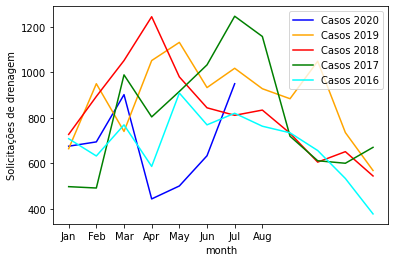

In [ ]:
# Comparação de solicitações de drenagem para anos de 2020 a 2016

ax = crossed_info.plot(x='month', y = 'CHAMADOS_EMLURB', ylabel='Solicitações de drenagem', xlabel='Mês', kind = 'line', color='blue', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='orange', label='Casos 2019')
crossed_info18.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='red', label='Casos 2018')
crossed_info17.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='green', label='Casos 2017')
crossed_info16.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, color='cyan', label='Casos 2016')

## **Boxplots e Outliers**

O boxplot tem como objetivo estudar as medidas estatística do conjunto de dados, como variabilidade, média, e outliers.

**Dengue**

Como visto nos gráficos anteriores, 2016 foi um ano atípico, consideraremos ele como outlier, e o gráfico com o mesmo adicionado será mostrado em segundo, após o gráfico princial, com dados de 2020 até 2017

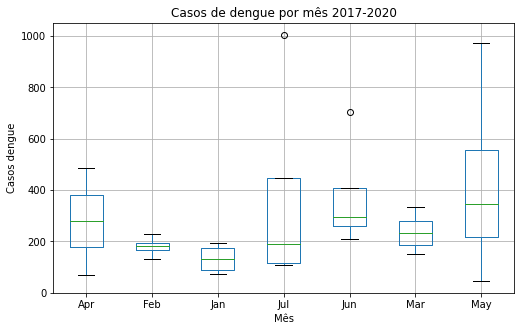

In [ ]:
#Boxplot para os casos de dengue por mês no primeiro semestre de 2016 a 2020

data_temp_19 = crossed_info19
data_temp_19 = data_temp_19.drop(data_temp_19.index[[7,8,9,10,11]])

data_temp_18 = crossed_info18
data_temp_18 = data_temp_18.drop(data_temp_18.index[[7,8,9,10,11]])

data_temp_17 = crossed_info17
data_temp_17 = data_temp_17.drop(data_temp_17.index[[7,8,9,10,11]])

data_temp_16 = crossed_info16
data_temp_16 = data_temp_16.drop(data_temp_16.index[[7,8,9,10,11]])

data_temp_16 = data_temp_16[['CASOS_DENGUE', 'CHAMADOS_EMLURB', 'month']]
data_temp_17 = data_temp_17[['CASOS_DENGUE', 'CHAMADOS_EMLURB', 'month']]
data_temp_18 = data_temp_18[['CASOS_DENGUE', 'CHAMADOS_EMLURB', 'month']]
data_temp_19 = data_temp_19[['CASOS_DENGUE', 'CHAMADOS_EMLURB', 'month']]
data_temp_20 = crossed_info[['CASOS_DENGUE', 'CHAMADOS_EMLURB', 'month']]

merge_info = data_temp_20.append([data_temp_19,data_temp_18,data_temp_17], ignore_index = True)

ax = merge_info.boxplot(column=['CASOS_DENGUE'],by="month",figsize=(8,5), )
ax.set_xlabel("Mês")
ax.set_ylabel("Casos dengue")

title_boxplot = 'Casos de dengue por mês 2017-2020'
plt.title( title_boxplot )
plt.suptitle('')
plt.show()


In [ ]:
merge_info = merge_info.append(data_temp_16, ignore_index=True)

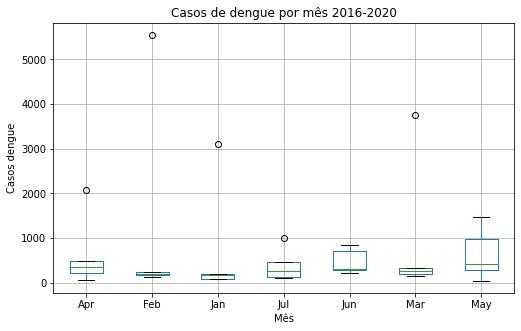

In [ ]:
ax = merge_info.boxplot(column=['CASOS_DENGUE'],by="month",figsize=(8,5))
ax.set_xlabel("Mês")
ax.set_ylabel("Casos dengue")

title_boxplot = 'Casos de dengue por mês 2016-2020'
plt.title( title_boxplot )
plt.suptitle('')
plt.show()


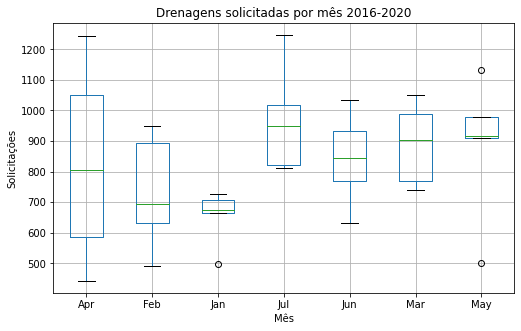

In [ ]:
#Boxplot para solicitações de drenagem por mês no primeiro semestre de 2016 a 2020

ax = merge_info.boxplot(column=['CHAMADOS_EMLURB'],by="month",figsize=(8,5))
ax.set_xlabel("Mês")
ax.set_ylabel("Solicitações")

title_boxplot = 'Drenagens solicitadas por mês 2016-2020'
plt.title( title_boxplot )
plt.suptitle('')
plt.show()

## Detecção de Outliers com Z-Score

Um outlier de um conjunto de dados é definido como um valor que está a mais de 3 desvios padrão da média. A remoção de outliers de um data frame remove quaisquer linhas de dados que contenham um outlier. Cálculos de outliers são executados separadamente para cada coluna.

In [ ]:
# Outlier para casos de dengue entre 2016 - 2020

z = np.abs(stats.zscore(merge_info.CASOS_DENGUE))
print(z)

outliers_positions = np.where(z > 3)
print("\nPosição de outlier(s) : ")
print(outliers_positions)


[0.45212341 0.46328967 0.44868763 0.56035031 0.57924707 0.44181608
 0.52599256 0.54145355 0.46672545 0.39371524 0.20302974 0.21527583
 0.01492108 0.24276202 0.55691453 0.50795475 0.48991693 0.3241408
 0.25972002 0.35248594 0.39371524 0.47445594 0.42206038 0.33358918
 0.43666242 0.3851258  0.37997214 0.5208389  2.05427422 4.13893051
 2.59798557 1.15753703 0.64646555 0.0967416  0.22106756]

Posição de outlier(s) : 
(array([29]),)


Ou seja, há um outlier na linha 29 da coluna que analisamos (CASOS_DENGUE).

In [ ]:
print("\nValor(es) de outlier(s) : ")
print(merge_info.CASOS_DENGUE[29])


Valor(es) de outlier(s) : 
5540


In [ ]:
# Outlier para drenagens entre 2016 - 2020

z = np.abs(stats.zscore(merge_info.CHAMADOS_EMLURB))
print(z)

outliers_positions = np.where(z > 3)
print("\nPosição de outlier(s) : ")
print(outliers_positions)

[0.75395527 0.66083115 0.35863288 1.89104976 1.61167741 0.95980858
 0.59389381 0.80786923 0.59389381 0.43537276 1.09382329 1.48592484
 0.51057223 0.92718013 0.49908926 0.31942273 1.09382329 2.03976828
 0.74093189 0.07435926 0.08738263 1.62638122 1.65578883 0.78504332
 0.12169152 0.42725065 1.00069917 2.04957082 0.59221338 0.96470985
 0.29323595 1.19016824 0.39294177 0.29323595 0.04327121]

Posição de outlier(s) : 
(array([], dtype=int64),)


Para solicitações de drenagem, nenhum outlier foi encontrado no conjunto.